In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]



array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:

y_test = y_test.reshape(-1,)

In [43]:
classes = ["airplane","automobile","bird","cat","deer","dog","medhak","horse","ship","truck"]


In [11]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

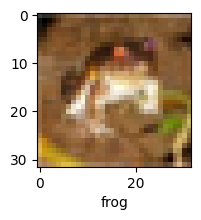

In [12]:
plot_sample(X_train, y_train, 0)

In [ ]:
plot_sample(X_train, y_train, 1)

In [14]:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.8121 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.6267 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5443 - accuracy: 0.4594
Epoch 4/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4815 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4335 - accuracy: 0.4976


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.50      0.54      1000
           1       0.63      0.58      0.60      1000
           2       0.43      0.28      0.34      1000
           3       0.31      0.50      0.38      1000
           4       0.55      0.26      0.36      1000
           5       0.45      0.24      0.31      1000
           6       0.46      0.64      0.53      1000
           7       0.63      0.45      0.53      1000
           8       0.59      0.65      0.61      1000
           9       0.41      0.72      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [17]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4713 - accuracy: 0.4692
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.1057 - accuracy: 0.6131
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9716 - accuracy: 0.6589
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8832 - accuracy: 0.6919
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8133 - accuracy: 0.7156
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7607 - accuracy: 0.7357
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7076 - accuracy: 0.7541
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6664 - accuracy: 0.7690
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6295 - accuracy: 0.7796
Epoch 10/10
1563/1563 [==============================] - 35s 22m

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9364 - accuracy: 0.6935


[0.9363836646080017, 0.6934999823570251]

In [21]:

y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[7.1522308e-04, 1.8360435e-05, 6.8417147e-02, 9.0596217e-01,
        6.0132919e-05, 2.2057500e-02, 1.4458421e-03, 6.0123290e-05,
        1.2527597e-03, 1.0687692e-05],
       [1.9235117e-03, 3.6455798e-01, 3.8309580e-07, 1.0135807e-06,
        1.3051585e-08, 1.1640092e-08, 2.3172321e-08, 1.2914651e-07,
        6.3346839e-01, 4.8526505e-05],
       [4.2983521e-02, 8.6741370e-01, 1.2906252e-03, 1.0145930e-02,
        2.2100290e-05, 2.4433984e-04, 2.0619194e-05, 5.2372832e-04,
        6.0161922e-02, 1.7193550e-02],
       [9.1013229e-01, 1.3970394e-03, 6.2530957e-02, 9.9347671e-04,
        1.7022678e-03, 5.1319537e-05, 1.3700593e-04, 9.2333859e-05,
        2.2851121e-02, 1.1217592e-04],
       [7.3171964e-07, 9.5273012e-05, 1.6177865e-02, 4.8342533e-02,
        5.9731650e-01, 2.2455330e-03, 3.3581901e-01, 1.1079310e-06,
        5.9847906e-07, 7.2037670e-07]], dtype=float32)

In [22]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

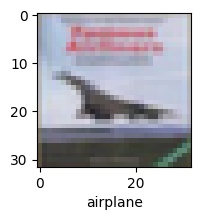

In [24]:

plot_sample(X_test, y_test,3)


In [25]:
classes[y_classes[3]]

'airplane'

In [26]:

classes[y_classes[3]]

'airplane'

In [27]:
import joblib

# Assuming 'model' is your trained model
model_filename = 'trained_model.joblib'
joblib.dump(cnn, model_filename)


['trained_model.joblib']

In [30]:
import cv2

In [33]:
image_path = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUSEQ8PEhISEg8PDxEPEQ8PERERDw8PGBQZGRkUGRgcIS4lHB4rHxgYJjgmLS8xNTU1GiQ7QEg0Qi80NTEBDAwMEA8QHhISHjQlJCQ0NDQ0NDQ0MTQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQxND0xNDQ0NDQ0NDQxPTQxNDQ0MTQ0Mf/AABEIALYBFgMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAAAgEDBAUGB//EADoQAAICAQIEAwcCAwcFAQAAAAECABEDBBIhMVFhBRNBBiIycYGRoRSxQlLRYnJzgpLB8SNDouHwFf/EABoBAAMBAQEBAAAAAAAAAAAAAAABAgMEBgX/xAAqEQACAgIBBAEEAQUBAAAAAAAAAQIRAxIxEyFBUQQiYXGBMgVCUqGxFP/aAAwDAQACEQMRAD8A5ww9440/eWk9pG6eltnmNIoUYBD9OI1ytgepjV+xNRXglsIkeVHVDLVxmG1AoJ+CgYJI03eaQskVFsy1hiZf00ZcZHpNgcD0h5w6SdmPpRRl2HpIbDc0nL2khwYbMNIvyZPIkbCPSbhtimvSPZi6MVwYzjJkeRNoHaMqQ2DopmEaeSME3bJGyG4dBGPyofp+817ZG2GzF0o+ilMIE0ogiEQR6ku2aRUY+Cxk7St8csGS5Nye6LaTMxSKcQl7RJabMZQRSMccrFyg+kzvulJWZSko9qLSwEVsglBMiXqZbsuOYyPO7SmFx0g2fssZ4u6LCFEjboRYRhQbpKvUWAiKtloy9pIz9pUJN9oqQ937Lkz9pb5h6TLvMkZDE4lxytcmtchk2esyhzGVjJcS1ls0AHrDbKePeOohRSl9i0VAVFBgJNFbFnCMD2lIc9JbuPSJopSQ4ftLBymfzDAZDE0UppF5aFynzO0jzD0hqLdF7NKWaRvuIzdrjUSZSJAgXURN19pIx36yq9mez8Fi5h0lnmAyldNf8Rjpp69b+cl0XFz9FoqI1R1QiT5cmzSmzI5J5CUOrevKdFlEr2X6S4yMZ4r8nNIhtnQfTASr9PLU0YPDJGIiRU3DT9o36f8As/iPdAsUjn1JqbX00rOAxqSYnCS8GapMvGA+sI7QtZejJJkhYwQ9IWIWFS9cPWOMY6RbIpQZnAlqp2j7R0j12kuRSjQq1yAhZ6RwDGCExWapMrFxWPWaRjgcQ6RbIbhKjMHEZXl5xfKV+X8o7ROskI2UCOM0hsNyRih9IltYDLDze0BjA9Y3liLsUthfMinL9oxQRSgjVEychvNWJ5okeR3kHCOsOxDlMDm7RWcnt8pJQfzfiIV7ylRm5PyyVciWrqK9PzKSJFQaTFGclwzYutHqDNOHOG5HjOVUZAfS/pJlBG0fkST79zrjHIdqmTE7j1P1EvTN1EyaaOpZE16KnyysZyfSWZVuVrhqWqoxk5X2J889op1rdj9JU+I85WVlKMWYyyTX2Ln1bHp9on6lu32ldQ2y9UR1JPyWfqW7faTKahCkG8vZcEjbZuXBH/SzDqI7FgZhCSCJv/TgSrKgEFKypY2kZge0bdK3cD0iHOegmlWc7mo9mzQGjb5jOU9ZBc9Yah1kbDkinKJjswj1RLzM0tnEQ5z0lW2FR6ozeWT8jnMZByHrIVZciL6iDpAnJ+SjeeskOZp2AcgIA9hJ2XorR+zNvPWAB7zV5Y6RlwfSPZD6Un5MdHvJozcNP3j+WIt0PoNnPCGWphmvyxJRJLmUsKTM4wDoJYuEdBNSY+0tTF2mbmdMcCMY0w6S1NMo9JsXFJOKQ5mqwpeDN5Yh5c0HFI8uLYrQz+XFOOXvKzkjTZLSRmbDKmwzUWiETRSZjKEWZtgHpI2dpqCQqVsZ9MxnFImwrCPZi6SE/Vd5I1F/xTnlT0MgoekekSF8iXo6LOev5lL36/vMdHvGF9CY1GglncvA7IT0roDEGEyQ/QVGGYx9zK433IGAxlwfWHnmXaZmZlVVJZiFVVFlieQEltpWVBQboVdPfpLMekLGlUk9FBJ/E7mDRa3AGYeFLnYfC+bV4KP+S6H1JM6/hHtBqjn8rUaPHp9OqOfNXIt7g1KoQE3Y49v34J/Mp1FX+z6uP+npq5Ov0eT/APzH9ceT5lHr9pSdKL7z6Y3juEc2UcSOJBvvOPqvE8TMwbJgdH99FyqpZFNXRa9wFkgcKoD14TH5k/MTR/0/HXZnjPLAlOQiewGk0mUKzIqWCGOBnYhuBUqoJFcwfd5jpxmF/Z7CxAXNkxMSF/6yK6hrqrG33SeTVR+hraHy4f3Wv0c+T4OVL6En+zzYyCRz5T0CezBPvDKmQVfBihFXYO4AAijYuxUM3gTpxKOF6hSy/ccJqvk4nwznXw81fUqOJjQy9AeXH7Tbj06g8bvoZrUAcopZTWHx3XJgxaRm9a+c0Hw/+0ZoVTccp85k5s6I4o1wYP0oHM3HCKJofHF8sR7WGiXCK7AgMogyCVNCkyW2i7zxPPeP+0jYci4cQUuq73ZhuUE/CpHysnjfFe99HW6pcWN8r/Cilj36KO5ND6zwGkY5s29+LZsw3dBubkOwuvpMsrqorlm2K5XJ8I+mpkJAug1CwOV1xgXmI6ntNOLS5n4rhyEfzbGC/wCo8Js4qPJzrJtx3FZom2bR4TkHxnFi/wATKn7LZli6LEvx6jdXNcOJ2+zMQPxJ6sV2Tv8ABXTm+7Vfk5+wRHnUvAvw4suT/FyBB9lF/mH6uvgxYE6EYwzj/M1mPqPwgeNezjMfzI2NOllDuxZ2LFuJ7/QQTTSlN+aIeFN9rOd5DwnYGmhDrD/8x5U3IsySskIZ2Hx+9ldmTuPUyzyzDyj0haHrL0V8ZIM0rp+80JhUeklzSNI4ZP7GFdx/4nS8J1DYc2PMOBUtxIutylbr63ICdBLFX0mWRqUWvZ0YsbhJSvuu52dRqcmQ22VyDxq+H0qYn0d8SSe5uZculd8bKuTIhAJXy3bG26uAsHlPIZ8Oux5AFz6jeWKhfMzFXYKrGlY8OBblYNT484Txyq7R6DHOOSN1TPZtofmO/CZ9Tp2GTGgQur7t78KQUasdyK+h7Geeyv4kgpcz7hwBdMZBH+ZTcbD7Q6/HtGTGmQj4mfHtB+RRuH2mcskvwbQUE7qz0D+GqPhBT+4Sn7SQ+XHYGR642r+8CDX/AN9TOTj9tGHDLpCB/Njyf7Oqj8zdg9rNK9b/ADcd/wA+JnUfVNwlLN7IeNG5PE842tSZNpVrsruKkML28xYBo8OA6ToaD2rbEoU4mCjkA28D5Wb/AOZz9PrdNlNY8+Jm/lGRQ/8ApPGaW0gqwbHfiI94vlC1kuGdvF7U6bLQyotnl5qC+nqJsTHpMnFfdPVGP7GxPHDCRkQFQqEnflPvKgrgSt3znXXJoUCu2QO9A3iQqb51Yu4OUVw6Fq3yjtN4QjcUy12YA/kf0mTJ4S//AG2x5SOYR1tfvPBe3PtK2Mrj0r5MaMivuLU7FhfEjkK9J53UanPl0x1GUuNZpXwFNSbTPk02YNsVnFFqKghibpiI45ZXyJ4o1wfTdRp8q/Fjcdyp2/flK8emyN8OJ27hGI+9TxPgXtrq8dDNqMjVSK2Q+ZtDHizFudUOJ4jj1nf1ftBnrdk1Lnd8NMMYPb3AJUvlOPizJfG28ndXwfMeJQIOrui19LuKfDEF79ThFcxj35SPsBMGDS5cxXa+Jf5smocv6c14k8+omLF4TqczbSjttYr75CIDyNEkA/SZv5WXwqNF8XH5dmvxDQaLJsGTUZ3CMW2YfLxqzVQLbtx4caqUYm0OFg2LR73WqyZ8mXIbHIlWNX3qcXxHSZNEHdsGRBuAK5BeJratyOhKX/ZsHtLPZ3UNnzMH2OiYy21U9wMSoFg+vxfaQnlyStvk3SjDG0uF3q/J2c3tBqCD+mTDhr0xYgCB3YCLhyanUKHfOwBsH3+IPI8F/wByJ1UThVUByHKOuP8APH5zdfH7/VKzl63+Ko5+n8NVDuLMzcjfAH6f+5oOMek07ZDLOiKUFSMZXN2zOMcnYIzGKTNLZFIZRLEMqBjXE0NMsLwle09ZMVILZwk06zQmMS5MPaXLh7TolM5IYa8GXyBA4hOguDtJ/TjpM+oa9H7HMOIRxhnR8gSRjEHkGsJhGCW48U1BBHAkubKjjSKFQzzftN4mmnz4FOPdkUJlDs5RNhZ0Kk0eVkk1w4deHrVWNs436j19RMpNvg2ikuShcabA5dgCm8jyzairN2Ryng/EPbBvO8tcGN8W6igDrnZfUrkUhlauNjh1Bn0UYwbDC1YFWHqVIo/ifPNd7N59HrVzYc+DyW3gZsjIWXGRRD4WO5jXKhRNcQOM58zfvsdGFLwu5Rq9bk0+oZcjYtTpqxujZdgzHTuqsjUo3btrAXRFg8poxvptRbjCAt0ASd6/P0P2nM16nU53fGjqjbMCB05YEUKpboOF/XtO/wCyvsoux31Kh91bArvQom2UijXEDjd19+fXd0uTdyUVfcyZvBMJXcr5OdFdrlQe3of3nP1OgbFQx6lsbMN4HmeWSpPMKCDz9an0fT+GY0QIEUgWLKqCR3ocZwvGvAjjxZnxO5QIW8kFiQQea1z9fpHLDKKvkmOWMnR5bDm1+0HHmyPRA3HKMiHhfN748uH5mhM+uRt+TGcyMLO1Md/NSnD73Nfheh1L4VOJCcRcn4sY3tY4iyDW2uP9OPT02g1BbHjyYzjxsxDPauVO1ivJjzbaPrMnGb8GjlBeTj+JvptbjVMjZNFqcS7UyahCcOVONIxXipHIGqqZj4ey6ddLjbJmDOj5s+x9jIgOzHiB/gWyeNcTfLgPZr4G44HKrL0bHX+5nH8Yx6fSZMCZkDtqd4BTDjCIq0CWN2fiHIH1la5Eu6/2JSg32ZwE8GdQH9xdzX5TOC4X0oKTX19Jfjd2DocYyByQ2JVYvu9SDxv0mTwTVY8jMjsMG5TsLMqqoG4kO7AKOFAfLvPQrotThF4s2VUemtduTGwqwbKstVJd33GqL/C/DGGOnRsZViE3Gn2cxZBvgSRx9AJqZMqCly5AOVE7x+eMw4/GNSp2v5WT5oUf7qa/8Z1NHrXeg2F1vhaf9RB3JIXh8rm0czquTOWNc8C4NbqUFLktaoq6+6RVVtPp2i6TLjxl3TT7M2Tar+Wi48TbSaIXdQ+I8l+c6YxGwDzIPwgUK9L+snyAPS/tNFKcv4qiJKEeXZQmrd+KpjABqy5aj3HCPeQ88ir/AHF/rGTCFvatWdxr1NAX+BIKHpOiOK/5N/8ADmllr+KQhv1yOfkQn7Stq6X/AHizfuZeMJ6RhglrHBeL/Jm8mR+a/BmVq4AADoBQgS01rhjeXNNkuCNZPlmRVb1l6iW7YuyDlY1Ghd0mT5cIuxXcdMEs8sCaCsjbMdmzZRSKKkbT0mjbJqFhqZwh6Rxi7S2SDFsw1QgxSfKEfdDdFbCkL5cNkbdI3GHcfYjZB8YIogEdCLEncZBMAKv0SXflpfXYv9JdsEiFRJVwDdk0J5H2wOtV3fCXOjbStjcYgjMmRyylio98mmU2t0Ae89bUKhJWhxdPg+V+z3tPm0YdHxnLhD7W3lkbHkJ4lnIJBpWG0gcvSp9UXICAQOBAPHnKk0qKXZceMNkYO5VFBdxyZjXE9zLaijGkOUr4Qb+0xeJeHYtSmzNjRwAwUsoLIWFFkbmp7joJtqNtldiO54pvYLEcmVvOybHRQim2dHBUl2cn3xwPAj+LsJ6nRaUYsePECSMaKgZviIAqzNlSKiSS4Kbb5E2w2yzbDbGIq2Q2S3bDbCxUU+XDZL9sNsNg1M+2G2aakR7BqZ9naQUPSaYQ2CjL5ckY5oMI9hUinZCWwisdDlJFSwxSJFl0JUipZUKjsKE2w2x6hULFQm2FR6hthYUJUKj1JqFhRXtk7Y9QqFhQm2FR6gBCwoWpFSypMLHRXskhI8IWKhdsKjVCoDoWoVGqEQC1IjSIxEQqTCAEQhIqABcUtG2w2xgLcI22TtisKK6k7Y9QqFhRXUJZthCxUPUKhcLkGgVCpEIwCEiTGIIQhAAhCEACEi5G6AhoXEuFxhY8LiQgIe4XFhABrhciEQEyakSbgMioVJuRcACpFSYXAAqFQuFwAKhULhcACoQuFwAJMW4RgNCLCIBoQqBklEQhIjAIXIhUYibkXIqFQETcjdCoVGAXCEIAEISIATJiwgIaEWTACYXIhACbhci4XABrhEuG6AWPC5XuhuhQWWXC5XuhcKCx7hcS4XCgse4XEuRcKCx7hcS4QoLLN0IkIUFl9SKhCQWEIQgBFQqEIwCoVCEBBUiEIARCEIxBCpEIAFQhCMQQhCAAZEIQERCEIwIqQRCEAIkEwhGiGRuk7oQgAbpNwhAZNwhCIAhCECiYQhAD/9k='  # Replace with the actual path to your image
image = cv2.imread(image_path)
#image = cv2.resize(image, (224, 224))

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def classify(image_path, model, class_labels):
    # Load the image
    original_image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if original_image is None:
        print("Error loading the image.")
        return None

    # Resize and preprocess the image
    resized_image = cv2.resize(original_image, (32, 32))
    normalized_image = resized_image / 255.0
    preprocessed_image = np.expand_dims(normalized_image, axis=0)  # Add a batch dimension

    # Make predictions
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_index]

    # Display the original image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted class: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class




1/1 [==============================] - 0s 19ms/step


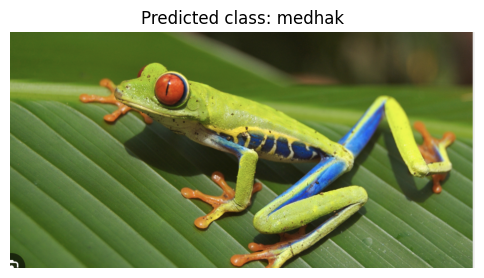

Predicted class: medhak


In [45]:
# Example usage
image_path = '/content/Screenshot 2023-10-15 at 22.59.03.png'  # Replace with the actual path to your image
predicted_class = classify(image_path, cnn, classes)

# Print the predicted class
print("Predicted class:", predicted_class)